<p style="background: linear-gradient(90deg, #fbc2eb, #7490c2ff);
font-family: 'Montserrat', sans-serif;
         font-size: 25px;
         text-align: center;
         color: #1f1f1f;
         padding: 22px 42px;
         border-radius: 30px;
         border: linear-gradient(90deg, #fbc2eb, #7490c2ff);
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;a
         word-spacing: 4px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 10px 0 18px;">
STREAO DEPTH ESTIMATION
</p>

<div style="font-family:'Montserrat',sans-serif;
background:#ffffff;
padding:20px 24px;
border-radius:14px;
border:1px solid #e6f0ff;
box-shadow:0 6px 18px rgba(0,0,0,0.06);
color:#2a2a2a;
max-width: 95%;
margin: 0 auto 20px auto;">

<h3>📌 Project Overview</h3>

<p style="line-height:1.8; font-size:15px;">
This notebook presents a complete development pipeline for stereo depth estimation,
with a strong focus on building and validating an FPGA-ready implementation of the
Semi-Global Matching (SGM) algorithm.
</p>

<p style="line-height:1.8; font-size:15px;">
The workflow progresses step-by-step from high-level validation to structured
algorithm design and hardware-oriented preparation:
</p>

<ul style="line-height:1.8; font-size:15px;">
<li>Using OpenCV to generate reference disparity maps (SAD / SGBM)</li>
<li>Analyzing and refining disparity results with filtering techniques</li>
<li>Implementing the SGM algorithm from scratch using NumPy</li>
<li>Designing multi-path cost aggregation for hardware compatibility</li>
<li>Preparing grayscale image data and parameters for FPGA / Vivado simulation</li>
<li>Comparing Python, HLS, and Verilog outputs within a unified framework</li>
</ul>

<p style="line-height:1.8; font-size:15px;">
The objective is not only to evaluate stereo matching performance,
but to establish a clear and traceable transition from algorithm development
to FPGA-oriented implementation.
</p>

</div>


<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
Import Libraries
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:20px;">📚</span>
    <h3 style="margin:0; font-size:17px; color:#1f3b68;">Importing Required Libraries</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    In this section, all required Python libraries are imported.
    These libraries are used for numerical computation, image processing,
    visualization, and file management.
  </p>
</div>


In [92]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
      Loading Stereo Images & Visualizing Input Images
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:20px;">🧩</span>
    <h3 style="margin:0; font-size:17px; color:#1f3b68;">      Loading Stereo Images & Visualizing Input Images

</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    The left and right images of the stereo pair are loaded from disk.
    These images originate from the <strong>Middlebury Stereo Vision Dataset</strong>
    and serve as input for depth estimation.
    The grayscale stereo images are visualized to verify
    correct loading and alignment before disparity computation.
  </p>
</div>


<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;
            box-sizing: border-box;
            overflow-wrap: break-word;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:20px;">📂</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Dataset</h3>
  </div>

<p>
The stereo image pairs are taken from the Middlebury Stereo Vision Dataset:
</p>

<p>
🔗 https://vision.middlebury.edu/stereo/data/scenes2006/
</p>

<p>
This dataset is widely used as a benchmark for evaluating stereo matching algorithms.
</p>

</div>


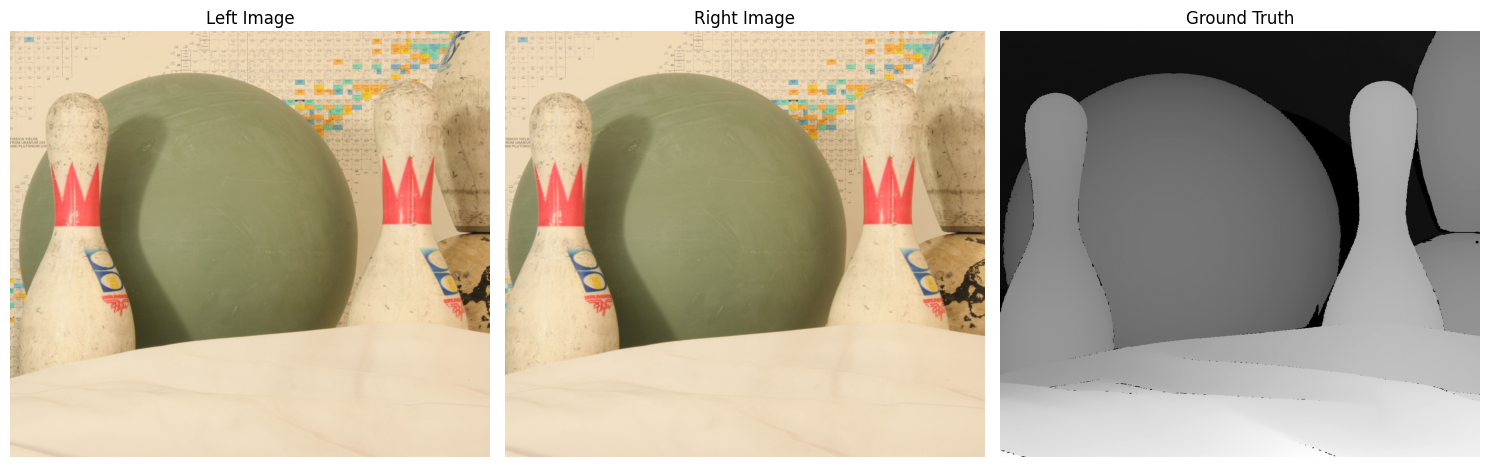

In [93]:
left_img = plt.imread('./data/raw/left.png')
right_img = plt.imread('./data/raw/right.png')
gt_img = plt.imread('./data/raw/Ground_Truth.png')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(left_img, cmap='gray')
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(right_img, cmap='gray')
plt.title('Right Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gt_img, cmap='gray')
plt.title('Ground Truth')
plt.axis('off')

plt.tight_layout()
plt.show()


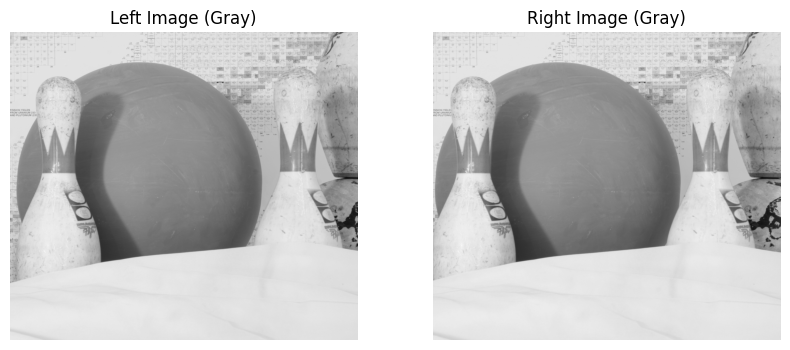

In [ ]:
left_gray_pil  = Image.open('./data/raw/left.png').convert('L')
right_gray_pil = Image.open('./data/raw/right.png').convert('L')

# Convert PIL → NumPy uint8
left_gray  = np.array(left_gray_pil, dtype=np.uint8)
right_gray = np.array(right_gray_pil, dtype=np.uint8)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(left_gray, cmap='gray')
plt.title('Left Image (Gray)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(right_gray, cmap='gray')
plt.title('Right Image (Gray)')
plt.axis('off')

plt.show()

<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
SAD Disparity Estimation (StereoBM)
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">📏</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Sum of Absolute Differences (SAD)
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    The SAD algorithm computes disparity by comparing square blocks
    between the left and right images.  
    For each pixel, a block window is shifted along the epipolar line,
    and the sum of absolute intensity differences is calculated.
    The disparity with the minimum cost is selected.
  </p>
</div>

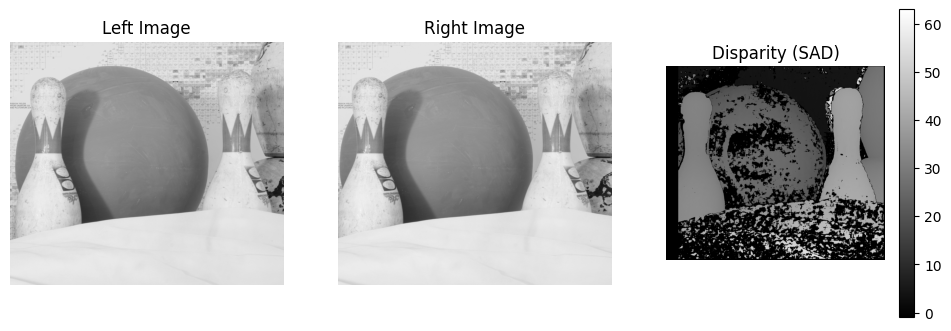

In [ ]:
# ---------- Initialize OpenCV StereoBM (SAD-based Baseline) ----------
stereo_bm_processor = cv2.StereoBM_create(
    numDisparities=64,
    blockSize=15      
)

# ---------- Compute Raw Disparity Map ----------
disparity_raw_sad = stereo_bm_processor.compute(left_gray, right_gray).astype(np.float32)

# ---------- Normalize Disparity for Visualization ----------
# OpenCV StereoBM returns values scaled by 16; conversion to floating point pixel offsets.
sad_disparity = disparity_raw_sad / 16.0

# ---------- Render Stereo Results ----------
# Visual comparison of input pairs and the resulting SAD-based disparity map.
plt.figure(figsize=(12, 4))

# Reference (Left) Image View
plt.subplot(1, 3, 1)
plt.title("Reference Left Image")
plt.imshow(left_gray, cmap='gray')
plt.axis('off')

# Target (Right) Image View
plt.subplot(1, 3, 2)
plt.title("Target Right Image")
plt.imshow(right_gray, cmap='gray')
plt.axis('off')

# Resulting Disparity Map (WTA on SAD windows)
plt.subplot(1, 3, 3)
plt.title("Disparity Map (SAD)")
plt.imshow(sad_disparity, cmap='gray')
plt.colorbar(label='Pixel Offset')
plt.axis('off')

plt.show()

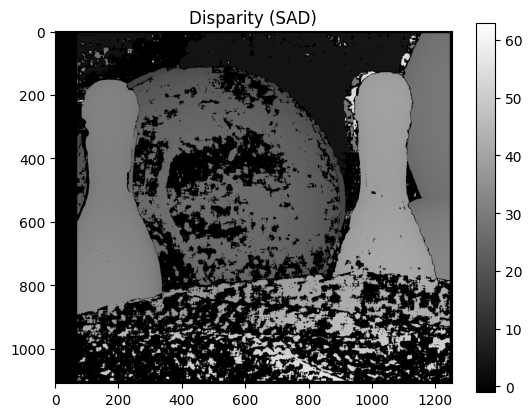

In [97]:
plt.imshow(sad_disparity, cmap='gray')
plt.title("Disparity (SAD)")
plt.colorbar()
plt.show()

<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
SGM Disparity Estimation (StereoSGBM)</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🧠</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Semi-Global Matching
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    Semi-Global Matching extends block matching by aggregating costs
    along multiple directions.  
    Smoothness constraints penalize abrupt disparity changes,
    resulting in cleaner and more realistic depth maps.
  </p>
</div>

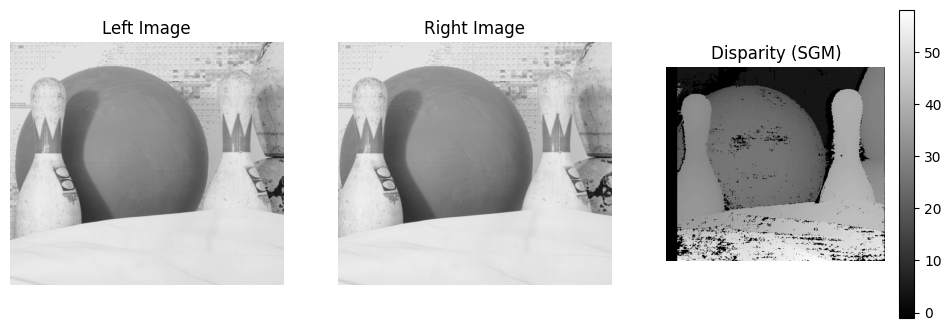

In [ ]:
# ---------- Configure Semi-Global Matching (SGBM) Parameters ----------
matching_block_size = 3

stereo_sgbm = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=64,
    blockSize=matching_block_size,
    P1=8 * 1 * matching_block_size * matching_block_size,
    P2=4 * 1 * matching_block_size * matching_block_size,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=2
)

# ---------- Compute Disparity Map ----------
disparity_raw_sgm = stereo_sgbm.compute(left_gray, right_gray).astype(np.float32)

# ---------- Normalize Disparity Map ----------
sgbm_disparity = disparity_raw_sgm / 16.0

# ---------- Render SGM Results ----------
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Reference Left Image")
plt.imshow(left_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Target Right Image")
plt.imshow(right_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Disparity Map (SGM)")
plt.imshow(sgbm_disparity, cmap='gray')
plt.colorbar(label='Pixel Offset')
plt.axis('off')

plt.show()

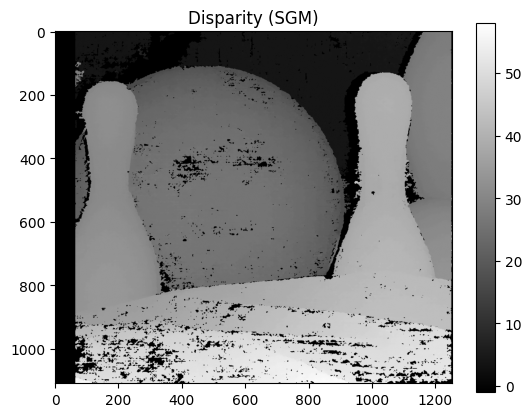

In [99]:
plt.imshow(sgbm_disparity, cmap='gray')
plt.title("Disparity (SGM)")
plt.colorbar()
plt.show()

<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
Refining SGM Output with WLS Filtering</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🧠</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Post-processing of Disparity Map
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    In this section, the raw disparity map obtained from the
    StereoSGBM algorithm is refined.
    Left–right consistency information and Weighted Least Squares (WLS)
    filtering are applied to reduce noise, handle occlusions,
    and preserve depth discontinuities.
  </p>
</div>

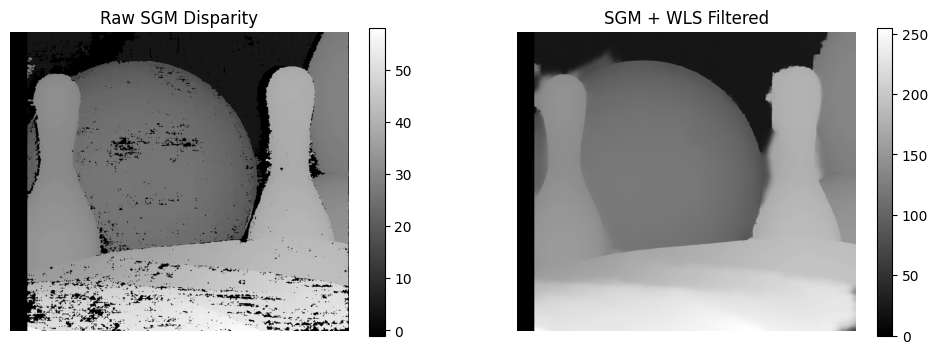

In [ ]:
# ---------- Convert disparity to fixed-point format for WLS filtering ----------
disparity_left_fixed = (sgbm_disparity * 16).astype(np.int16)

# ---------- Initialize Right-View Matcher ----------
matcher_right_view = cv2.ximgproc.createRightMatcher(stereo_sgbm)

# ---------- Compute Right-to-Left Disparity ----------
disparity_right_fixed = matcher_right_view.compute(right_gray, left_gray)

# ---------- Initialize Weighted Least Squares (WLS) Filter ----------
filter_wls = cv2.ximgproc.createDisparityWLSFilter(stereo_sgbm)

# ---------- Configure WLS Hyperparameters ----------
filter_wls.setLambda(150)
filter_wls.setSigmaColor(2.0)

# ---------- Execute Disparity Refinement ----------
disparity_filtered_fixed = filter_wls.filter(
    disparity_left_fixed,
    left_gray,
    None,
    disparity_right_fixed
)

# ---------- Normalize Refined Disparity for Visualization ----------
filtered_disparity = cv2.normalize(
    disparity_filtered_fixed,
    None,
    0,
    255,
    cv2.NORM_MINMAX,
    cv2.CV_8U
)

# ---------- Render Comparison Results ----------
plt.figure(figsize=(12, 4))

# Raw SGM Result
plt.subplot(1, 2, 1)
plt.title("Raw SGM Disparity")
plt.imshow(sgbm_disparity, cmap='gray')
plt.colorbar(label='Pixel Offset')
plt.axis('off')

# Refined SGM + WLS Result
plt.subplot(1, 2, 2)
plt.title("SGM + WLS Filtered")
plt.imshow(filtered_disparity, cmap='gray')
plt.colorbar(label='8-bit Intensity')
plt.axis('off')

plt.show()

<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
Visual Comparison of Disparity Maps
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🔍</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Qualitative Evaluation
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    In this section, the disparity maps obtained using
    SAD, SGM, and SGM followed by WLS filtering are visualized
    side by side.  
    This comparison highlights the impact of smoothness constraints
    and post-processing on depth quality.
  </p>
</div>

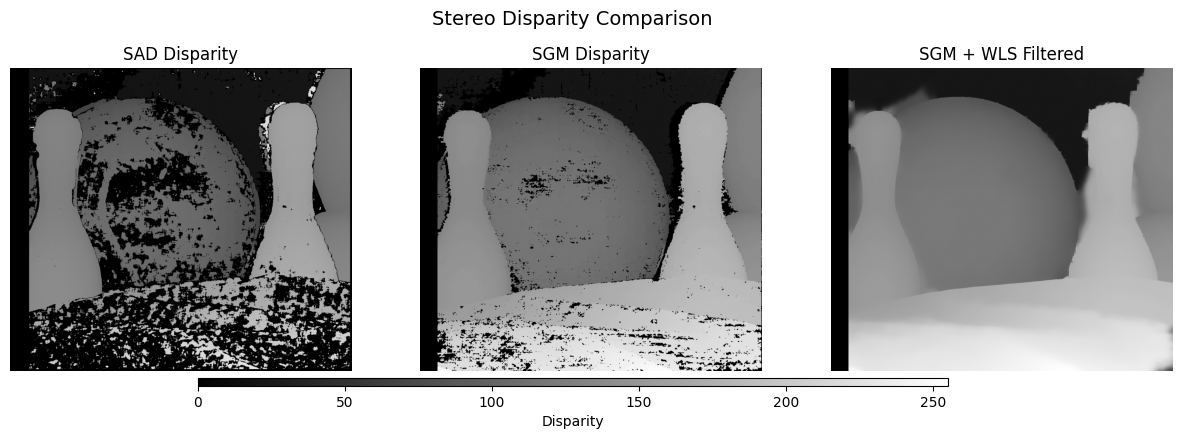

In [ ]:
# ---------- Final Visualization of Stereo Matching Pipeline ----------

# Initialize figure for side-by-side comparative analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Array of results and corresponding metadata for iterative plotting
# 1. disparity_map_normalized: Baseline local SAD matching result.
# 2. disparity_map_sgm: Result after global cost aggregation.
# 3. disparity_map_filtered_visual: Final result after LRC check and WLS filtering.
disparity_results = [sad_disparity, sgbm_disparity, filtered_disparity]
comparison_titles = ["SAD Disparity", "SGM Disparity", "SGM + WLS Filtered"]

# Iterate through subplots to render each disparity map
for ax, img, title in zip(axes, disparity_results, comparison_titles):
    image_handle = ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=12)
    ax.axis('off')

# ---------- Global Colorbar Configuration ----------
colorbar_axis = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(image_handle, cax=colorbar_axis, orientation='horizontal', label='Disparity Intensity')

fig.suptitle("Stereo Matching Algorithm Comparison: Baseline vs SGM vs Refined", fontsize=14, y=1.02)

plt.show()

<p style="background: linear-gradient(90deg, #a6c1ee);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #8fa6dc;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
Comparison Summary
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">📌</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Key Takeaways
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    While SAD offers simplicity and low computational cost,
    its output quality is insufficient for practical depth estimation.
    SGM achieves a strong balance between accuracy and complexity,
    making it a suitable candidate for hardware-oriented optimization.
    Although SGM with filtering delivers the highest visual quality,
    its computational requirements make it unsuitable for FPGA
    implementation.
  </p>
</div>

<p style="background: linear-gradient(90deg, #7490c2ff, #fbc2eb);
font-family: 'Montserrat', sans-serif;
         font-size: 24px;
         text-align: center;
         color: #1f1f1f;
         padding: 22px 42px;
         border-radius: 30px;
         border: linear-gradient(90deg, #7490c2ff, #fbc2eb);
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;a
         word-spacing: 4px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 10px 0 18px;">
Towards FPGA-Oriented Implementation
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e7c2fb;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🚀</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Design Decision
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    Based on the above comparison, a simplified version of the SGM
    algorithm is selected as the target architecture.
    This version aims to preserve most of the quality benefits of SGM
    while significantly reducing computational and memory complexity,
    making it suitable for FPGA implementation.
  </p>
</div>

<p style="background: linear-gradient(90deg, #baa2c4);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f2937;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #baa2c4;
         box-shadow: 0 8px 20px rgba(0,0,0,0.12);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 14px 0 16px;">
Python Implementation From Scratch
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">

  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🧠</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">
      Motivation
    </h3>
  </div>

  <p style="margin:0; line-height:1.75; font-size:16px;">
    After validating stereo matching performance using high-level
    library implementations, the focus shifts toward understanding the
    algorithm beyond black-box behavior.  
    For this purpose, the core components of the SGM pipeline are
    implemented explicitly in Python as an intermediate and exploratory
    step prior to FPGA-oriented implementation, enabling transparent
    inspection and controlled experimentation under software-level
    conditions.
  </p>
</div>


<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
Data Cost Computation (SAD)</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e7c2fb;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🎯</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Purpose
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    This function computes the initial matching cost between the left
    and right stereo images using the Sum of Absolute Differences (SAD).
    The result is a 3D cost volume where each slice corresponds to a
    candidate disparity.
  </p>
</div>

In [ ]:
def compute_sad_cost_volume(image_left, image_right, max_disparity):
    """
    Computes the initial matching cost volume using Sum of Absolute Differences (SAD).
    
    This function generates a 3D cost space where each voxel represents the 
    pixel-wise difference between the left image and the right image shifted 
    by a specific disparity offset.

    Args:
        image_left (np.ndarray): Reference left grayscale image of shape (H, W).
        image_right (np.ndarray): Target right grayscale image of shape (H, W).
        max_disparity (int): The maximum search range for horizontal disparity.

    Returns:
        np.ndarray: A 3D cost volume of shape (H, W, max_disparity) with float32 precision.
    """
    height, width = image_left.shape
    cost_volume = np.zeros((height, width, max_disparity), dtype=np.float32)

    for disparity in range(max_disparity):
        # Shift the right image to the right to simulate disparity
        shifted_right = np.zeros_like(image_right)
        shifted_right[:, disparity:] = image_right[:, :width - disparity]
        
        # Calculate pixel-wise absolute difference (SAD baseline)
        cost_volume[:, :, disparity] = np.abs(image_left - shifted_right).astype(np.float32)

    return cost_volume

<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
SGM Path Aggregation</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e7c2fb;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🤖</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Core Idea
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    This function enforces smoothness along a single direction by
    penalizing disparity changes using P1 and P2.
    It is the heart of the Semi-Global Matching algorithm.
  </p>
</div>


In [ ]:
def compute_path_aggregation(cost_volume, direction, penalty_p1, penalty_p2):
    """
    Performs Semi-Global Matching (SGM) 1D cost aggregation along a specified path.
    
    This implementation follows the Hirschmuller SGM recursion, optimizing for
    disparity continuity by penalizing small and large disparity jumps.

    Args:
        cost_volume (np.ndarray): Initial matching cost volume (H, W, D).
        direction (tuple): A (dy, dx) tuple defining the direction of traversal.
        penalty_p1 (float): Penalty for a disparity change of +/- 1.
        penalty_p2 (float): Penalty for a disparity change > 1.

    Returns:
        np.ndarray: The aggregated path cost volume of shape (H, W, D).
    """
    height, width, max_disparity = cost_volume.shape
    path_cost_volume = np.zeros((height, width, max_disparity), dtype=np.float32)
    
    dy, dx = direction
    # Determine traversal order based on direction vector
    y_range = range(height) if dy >= 0 else range(height - 1, -1, -1)
    x_range = range(width) if dx >= 0 else range(width - 1, -1, -1)

    for y in y_range:
        for x in x_range:
            prev_y, prev_x = y - dy, x - dx
            
            # Check boundaries for the previous pixel in the path
            if 0 <= prev_y < height and 0 <= prev_x < width:
                prev_costs = path_cost_volume[prev_y, prev_x, :]
                min_prev_total = np.min(prev_costs)
                
                for d in range(max_disparity):
                    # L_r(p, d) = C(p, d) + min(L_r(p-r, d), 
                    #                          L_r(p-r, d-1) + P1, 
                    #                          L_r(p-r, d+1) + P1, 
                    #                          min_i(L_r(p-r, i)) + P2) - min_k(L_r(p-r, k))
                    
                    cost_no_change = prev_costs[d]
                    cost_small_step_down = prev_costs[d - 1] + penalty_p1 if d > 0 else 1e9
                    cost_small_step_up = prev_costs[d + 1] + penalty_p1 if d < max_disparity - 1 else 1e9
                    cost_large_step = min_prev_total + penalty_p2
                    
                    min_prev_cost = min(cost_no_change, cost_small_step_down, cost_small_step_up, cost_large_step)
                    
                    # Normalize aggregated cost by subtracting min_prev_total to prevent bit-width overflow in FPGA/HLS
                    path_cost_volume[y, x, d] = cost_volume[y, x, d] + min_prev_cost - min_prev_total
            else:
                # Boundary condition: Initialize path with the raw cost
                path_cost_volume[y, x, :] = cost_volume[y, x, :]
                
    return path_cost_volume

<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.15);
         letter-spacing: 1.1px;
         word-spacing: 3px;
         font-weight: 700;
         text-shadow: 1px 1px 2px rgba(0,0,0,0.08);
         margin: 16px 0 18px;">
Full SGM Pipeline
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e7c2fb;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">🏗️</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Final Disparity Estimation
</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    The aggregated costs from multiple directions are summed,
    and the final disparity is selected using Winner-Takes-All (WTA).
  </p>
</div>


In [ ]:
def semi_global_matching(image_left, image_right, max_disparity=64, p1=4, p2=72):
    """
    Main entry point for Semi-Global Matching (SGM) using 4-path aggregation.
    
    This function computes the initial SAD cost, aggregates costs across four 
    orthogonal directions (Left-Right, Right-Left, Top-Bottom, Bottom-Top), 
    and selects the best disparity via a Winner-Take-All (WTA) strategy.

    Args:
        image_left (np.ndarray): Left input image.
        image_right (np.ndarray): Right input image.
        max_disparity (int): Search range for disparity matching.
        p1 (float): Penalty for small disparity changes (smoothness constraint).
        p2 (float): Penalty for large disparity changes (discontinuity constraint).

    Returns:
        np.ndarray: Final disparity map of shape (H, W).
    """
    # Phase 1: Initial Matching Cost Calculation
    initial_cost_volume = compute_sad_cost_volume(image_left, image_right, max_disparity)

    # Phase 2: Multi-path Cost Aggregation
    # Orthogonal directions for standard 4-path SGM
    aggregation_directions = [
        (0, 1),   # Left -> Right
        (0, -1),  # Right -> Left
        (1, 0),   # Top -> Bottom
        (-1, 0)   # Bottom -> Top
    ]

    total_aggregated_volume = np.zeros_like(initial_cost_volume, dtype=np.float32)

    for direction in aggregation_directions:
        total_aggregated_volume += compute_path_aggregation(initial_cost_volume, direction, p1, p2)

    # Phase 3: Disparity Selection (Winner-Take-All)
    disparity_map = np.argmin(total_aggregated_volume, axis=2)
    
    return disparity_map

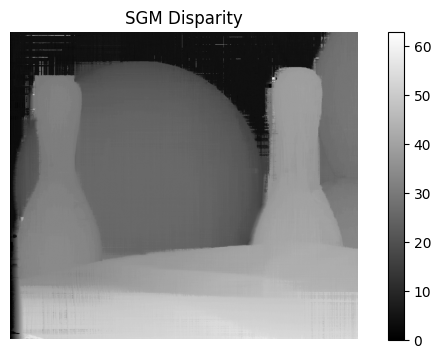

In [ ]:
# Compute disparity using the Python-based Semi-Global Matching (SGM)
python_disparity = semi_global_matching(
    left_gray.astype(np.float32),
    right_gray.astype(np.float32),
    max_disparity=64,
    p1=8,            
    p2=128           
)

# Visualize the resulting disparity map
plt.figure(figsize=(8,4))
plt.imshow(python_disparity, cmap='gray')
plt.colorbar()                           
plt.title('SGM Disparity')
plt.axis('off')
plt.show()

<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1a1a1a;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.12);
         letter-spacing: 1px;
         font-weight: 700;
         margin: 18px 0;">
Stereo Image Preparation for Vivado HLS Simulation
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:20px;
            border-radius:14px;
            border:1px solid #eef2ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.05);
            color:#2a2a2a;
            max-width:95%;
            margin:0 auto 22px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:10px;">
    <span style="font-size:18px;">🧩</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">
      Hardware-Aligned Image Preprocessing (HLS Flow)
    </h3>
  </div>
  <p style="margin:0; line-height:1.8; font-size:16px;">
    Stereo images are converted to 8-bit grayscale format, resized to the
    hardware-defined resolution (<b>240 × 272</b>), and exported as flattened
    decimal pixel streams. These files serve as deterministic input stimuli
    for Vivado HLS C-simulation and behavioral verification.
  </p>
</div>

In [120]:
# Stereo image preprocessing and dataset generation for Vivado HLS simulation verification

# Define target hardware dimensions (Height x Width) based on FPGA resource constraints
H, W = 240, 272

# Load raw stereo pair and convert to 8-bit grayscale (L mode)
image_left_raw  = Image.open('./data/raw/left.png').convert('L')
image_right_raw = Image.open('./data/raw/right.png').convert('L')

# Resize images to target resolution using BICUBIC interpolation for sub-pixel consistency
image_left_resized  = image_left_raw.resize((W, H), Image.BICUBIC)
image_right_resized = image_right_raw.resize((W, H), Image.BICUBIC)

# Convert PIL Image objects to NumPy arrays for numerical processing
image_left_array  = np.array(image_left_resized, dtype=np.float32)
image_right_array = np.array(image_right_resized, dtype=np.float32)

# Export flattened pixel data to text files for HLS testbench file I/O (std::ifstream)
np.savetxt("./data/processed/left_pixels.txt", image_left_array.flatten(), fmt="%d")
np.savetxt("./data/processed/right_pixels.txt", image_right_array.flatten(), fmt="%d")

# Log HLS simulation parameters
print(f"Vivado HLS Simulation image size: {H} x {W} ({H * W} pixels)")

Vivado HLS Simulation image size: 240 x 272 (65280 pixels)


<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1a1a1a;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.12);
         letter-spacing: 1px;
         font-weight: 700;
         margin: 18px 0;">
HLS SGM Output – Disparity Reconstruction & Visualization
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:20px;
            border-radius:14px;
            border:1px solid #eef2ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.05);
            color:#2a2a2a;
            max-width:95%;
            margin:0 auto 22px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:10px;">
    <span style="font-size:18px;">🖼️</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">
      Disparity Map Reconstruction from HLS Simulation
    </h3>
  </div>
  <p style="margin:0; line-height:1.8; font-size:16px;">
    The disparity values generated by Vivado HLS behavioral simulation
    (<code>hls_disparity.txt</code>) are reshaped into 2D image format,
    normalized for visualization, and exported as a grayscale PNG image.
  </p>
</div>


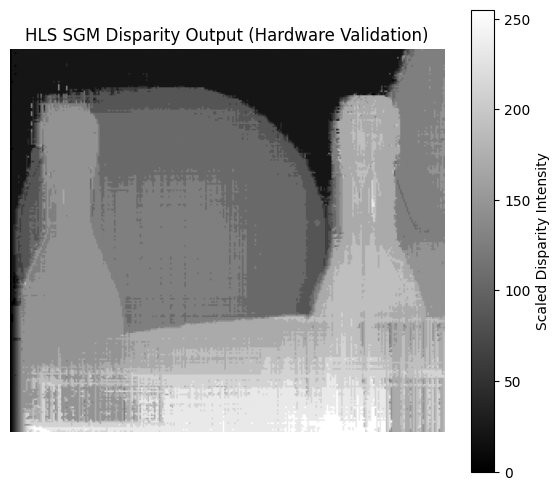

In [125]:
# Define target dimensions for HLS-generated disparity output
W, H = 272, 240

# Load raw disparity data produced by the HLS simulation
hls_disparity_flat = np.loadtxt("./results/hls_disparity.txt", dtype=np.uint8)

# Validate that the imported buffer size matches the expected hardware resolution
assert hls_disparity_flat.size == W * H, "Disparity size mismatch!"

# Reshape the 1D flat buffer back to the 2D spatial grid [Height x Width]
hls_disparity_map = hls_disparity_flat.reshape((H, W))

# Normalize disparity values to the full 8-bit dynamic range [0, 255] for visualization
hls_disparity_normalized = (hls_disparity_map.astype(np.float32) / hls_disparity_map.max()) * 255
hls_disparity = hls_disparity_normalized.astype(np.uint8)

# Render the normalized HLS disparity map using Matplotlib
plt.figure(figsize=(7, 6))
plt.imshow(hls_disparity, cmap='gray')
plt.colorbar(label="Scaled Disparity Intensity")
plt.title("HLS SGM Disparity Output (Hardware Validation)")
plt.axis('off')
plt.show()

# Save the final processed disparity map as a standard PNG for documentation
Image.fromarray(hls_disparity).save("./results/hls_disparity.png")

<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1a1a1a;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.12);
         letter-spacing: 1px;
         font-weight: 700;
         margin: 18px 0;">
Stereo Image Preparation for Verilog (RTL Simulation)
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:20px;
            border-radius:14px;
            border:1px solid #eef2ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.05);
            color:#2a2a2a;
            max-width:95%;
            margin:0 auto 22px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:10px;">
    <span style="font-size:18px;">🧩</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">
      Hex-Based Pixel Formatting for RTL Testbench
    </h3>
  </div>
  <p style="margin:0; line-height:1.8; font-size:16px;">
    Grayscale stereo images are exported as hexadecimal pixel streams,
    compatible with Verilog memory initialization using <code>$readmemh</code>.
  </p>
</div>


In [122]:
# Hardware target dimensions for Vivado RTL simulation
H, W = 240, 272

# Load raw stereo image pair and convert to 8-bit grayscale intensity
image_left_raw  = Image.open('./data/raw/left.png').convert('L')
image_right_raw = Image.open('./data/raw/right.png').convert('L')

# Resize images to match FPGA row/column buffer constraints using BICUBIC interpolation
image_left_resized  = image_left_raw.resize((W, H), Image.BICUBIC)
image_right_resized = image_right_raw.resize((W, H), Image.BICUBIC)

# Convert to 8-bit unsigned integer NumPy arrays for hardware-compatible bit-width
image_left_array  = np.array(image_left_resized, dtype=np.uint8)
image_right_array = np.array(image_right_resized, dtype=np.uint8)

# Flatten 2D spatial arrays into 1D streams for memory-mapped or streaming interface simulation
image_left_flat  = image_left_array.flatten()
image_right_flat = image_right_array.flatten()

# Export pixel data as hex strings for Verilog $readmemh
np.savetxt("./data/processed/left_pixels.hex",  image_left_flat,  fmt="%02X")
np.savetxt("./data/processed/right_pixels.hex", image_right_flat, fmt="%02X")

# Log image geometry and total pixel count for verification of loop tripcounts in RTL
print(f"Vivado hardware image size: {H} x {W} ({H * W} pixels)")

Vivado hardware image size: 240 x 272 (65280 pixels)


<p style="background: linear-gradient(90deg, #e7c2fb);
         font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1a1a1a;
         padding: 18px 38px;
         border-radius: 30px;
         border: 3px solid #e7c2fb;
         box-shadow: 0 8px 20px rgba(0,0,0,0.12);
         letter-spacing: 1px;
         font-weight: 700;
         margin: 18px 0;">
Verilog SGM Output – Multi-Path Disparity Comparison
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:20px;
            border-radius:14px;
            border:1px solid #eef2ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.05);
            color:#2a2a2a;
            max-width:95%;
            margin:0 auto 22px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:10px;">
    <span style="font-size:18px;">🖼️</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">
      Disparity Reconstruction from RTL Simulation
    </h3>
  </div>
  <p style="margin:0; line-height:1.8; font-size:16px;">
    Disparity maps generated by Verilog behavioral simulation
    (1-path, 2-path, and 4-path SGM variants) are reconstructed
    and visualized for qualitative comparison.
  </p>
</div>


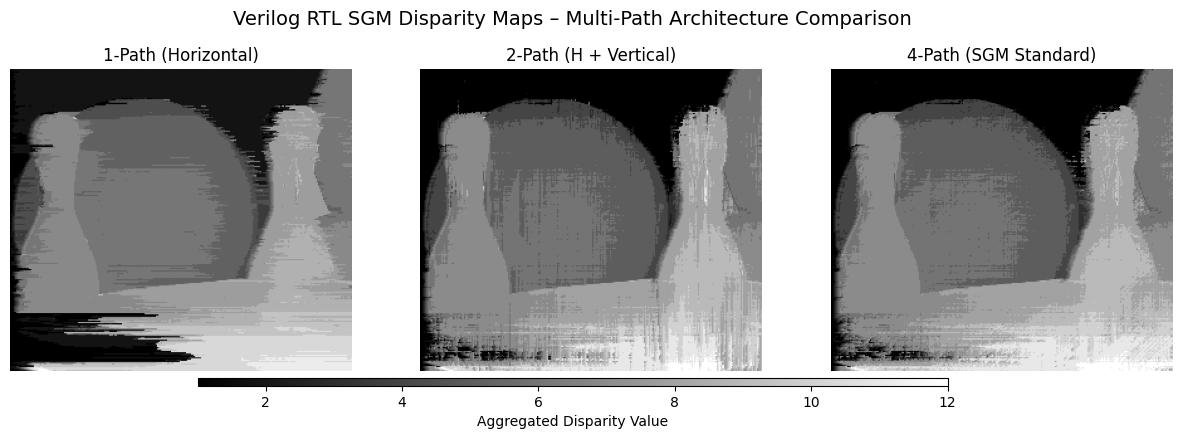

In [ ]:
# Hardware dimensions for the Verilog RTL simulation output
W, H = 272, 240

# ---------- Single Path Validation (4-Path Variant) ----------

# Load raw 4-path aggregated disparity data from RTL simulation output
verilog_disparity_4path_flat = np.loadtxt("./results/verilog_disparity_4path.txt", dtype=np.uint8)

# Validate that the Verilog output buffer matches the target hardware resolution
assert verilog_disparity_4path_flat.size == W * H, "Disparity size mismatch!"

# Reshape the 1D pixel stream into the 2D spatial image frame
verilog_disparity_4path = verilog_disparity_4path_flat.reshape((H, W))

# Normalize the 4-path disparity intensities to 8-bit range [0, 255] for visual inspection
verilog_disparity_4path_normalized = (verilog_disparity_4path.astype(np.float32) / verilog_disparity_4path.max()) * 255
verilog_disparity_4path_visual = verilog_disparity_4path_normalized.astype(np.uint8)

# ---------- Multi-Path Aggregation Comparison ----------

# Define mapping for RTL simulation results across different SGM path configurations
path_variant_files = {
    "1-Path (Horizontal)": "./results/verilog_disparity_1path.txt",
    "2-Path (H + Vertical)": "./results/verilog_disparity_2path.txt",
    "4-Path (SGM Standard)": "./results/verilog_disparity_4path.txt"
}

# Initialize comparative visualization for path-dependent cost aggregation quality
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (variant_label, file_path) in zip(axes, path_variant_files.items()):
    # Load raw disparity buffer for the specific RTL path architecture
    variant_data_flat = np.loadtxt(file_path)
    
    # Verify stream integrity against hardware resolution
    assert variant_data_flat.size == W * H, f"{variant_label} size mismatch!"
    
    # Reshape 1D hardware output to 2D disparity map
    variant_disparity_map = variant_data_flat.reshape((H, W))
    
    # Plot disparity map for the current path configuration
    im = ax.imshow(variant_disparity_map, cmap='gray') 
    ax.set_title(variant_label, fontsize=12)
    ax.axis('off')

# Configure global colorbar to represent disparity values across all variants
colorbar_axis = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(im, cax=colorbar_axis, orientation='horizontal', label='Aggregated Disparity Value')

# Finalize comparative plot for hardware-oriented SGM path analysis
fig.suptitle("Verilog RTL SGM Disparity Maps – Multi-Path Architecture Comparison", fontsize=14, y=1.02)
plt.show()

<p style="background: linear-gradient(90deg, #fbc2eb, #7490c2ff);
font-family: 'Montserrat', sans-serif;
         font-size: 22px;
         text-align: center;
         color: #1f1f1f;
         padding: 22px 42px;
         border-radius: 30px;
         border: linear-gradient(90deg, #fbc2eb, #7490c2ff);
         letter-spacing: 1px;
         font-weight: 700;
         margin: 18px 0;">
Stereo Matching Methods – Comparative Overview
</p>

<div style="font-family:'Montserrat',sans-serif;
            background:#ffffff;
            padding:18px 20px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 0 auto 20px auto;">
  <div style="display:flex; align-items:center; gap:10px; margin-bottom:8px;">
    <span style="font-size:18px;">📊</span>
    <h3 style="margin:0; font-size:20px; color:#1f3b68;">Comparing Disparity Maps</h3>
  </div>
  <p style="margin:10px 0 0; line-height:1.8; font-size:16px;">
    In this section, we visually compare disparity maps generated by multiple stereo matching methods,
    including SAD, SGBM, SGBM with post-processing, Python SGM, HLS, and Verilog 4-Path SGM.
    This comparison highlights differences in accuracy, smoothness, and edge preservation.
    Use this overview to assess trade-offs between software and hardware implementations
    and to choose the method that best fits your speed and quality requirements.
  </p>
</div>


In [ ]:
methods = {
    "SAD (Sum of Absolute Differences)": sad_disparity,  # Basic block-matching baseline
    "OpenCV SGBM (Reference)": sgbm_disparity,           # Standard software-optimized SGBM
    "OpenCV SGBM + WLS Filter": filtered_disparity,      # Refined software reference with post-filtering
    "Python SGM": python_disparity,                      # Functional baseline for hardware logic
    "HLS (C++ Synthesis)": hls_disparity,                # High-Level Synthesis implementation output
    "Verilog (4-Path RTL)": verilog_disparity_4path      # Final hardware-timed RTL implementation output
}

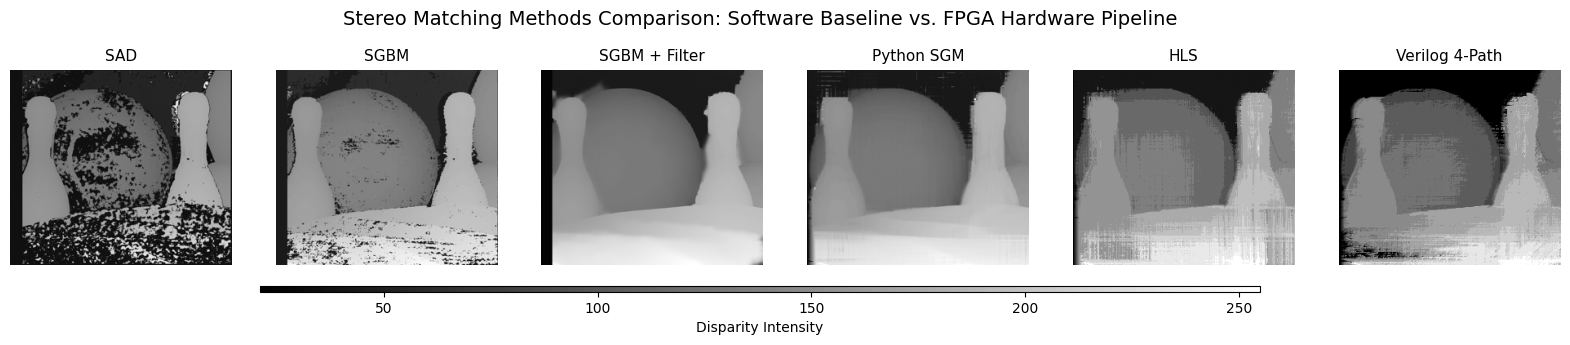

In [ ]:
# Hardware target dimensions for cross-implementation resolution matching
H, W = 240, 272

# Dictionary to store standardized disparity maps for side-by-side verification
disparity_results_normalized = {}

# Iterate through each algorithmic variant to ensure uniform spatial resolution
for method_name, disparity_buffer in methods.items():
    
    # Cast source buffer to NumPy array for dimension inspection
    disparity_array = np.array(disparity_buffer)
    
    # Handle multi-channel inputs (e.g., RGB/RGBA) by extracting the primary luminance channel
    if disparity_array.ndim == 3:
        disparity_array = disparity_array[:, :, 0]

    # Resize disparity map to match the FPGA's fixed-point processing grid using BICUBIC interpolation
    disparity_image_obj = Image.fromarray(disparity_array.astype(np.float32))
    disparity_resized = disparity_image_obj.resize((W, H), Image.BICUBIC)
    
    # Store the processed result in the comparison dictionary
    disparity_results_normalized[method_name] = np.array(disparity_resized)

# Initialize multi-plot figure for visual consistency check across the software-to-hardware pipeline
fig, axes = plt.subplots(1, len(disparity_results_normalized), figsize=(20, 3))

# Populate subplots with disparity maps from SAD baseline to Verilog 4-path RTL
for ax, (method_name, disparity_map) in zip(axes, disparity_results_normalized.items()):
    image_handle = ax.imshow(disparity_map, cmap='gray')
    ax.set_title(method_name, fontsize=11)
    ax.axis('off')

# Configure a shared horizontal colorbar for relative disparity magnitude comparison
colorbar_axis = fig.add_axes([0.25, 0.08, 0.5, 0.02])
fig.colorbar(image_handle, cax=colorbar_axis, orientation='horizontal', label='Disparity Intensity')

fig.suptitle("Stereo Matching Methods", fontsize=14, y=1.02)
plt.show()

<div style="
    background: linear-gradient(135deg, #1e293b 0%, #334155 100%);
    padding: 40px 20px;
    border-radius: 20px 20px 5px 5px;
    text-align: center;
    border-bottom: 5px solid #7c3aed;
    margin: 24px auto;
    max-width: 95%;
    box-sizing: border-box;
">



<h1 style="font-family: 'Inter', sans-serif;
           color: #f8fafc;
           margin: 0;
           font-size: 32px;
           letter-spacing: -1px;
           font-weight: 800;"

Final Project Summary
</h1>

<h2 style="font-family: 'Inter', sans-serif;
           color: #cbd5e1;
           font-size: 20px;
           margin-top: 12px;
           font-weight: 400;">
📌 FPGA-Oriented Stereo Matching Implementation Flow
</h2>

</div>

<div style="font-family:'Montserrat', sans-serif;
            background:#ffffff;
            padding:22px 24px;
            border-radius:14px;
            border:1px solid #e6f0ff;
            box-shadow:0 6px 18px rgba(0,0,0,0.06);
            color:#2a2a2a;
            max-width: 95%;
            margin: 16px auto 20px auto;">

### 🎯 Purpose of This Notebook

This notebook documents the complete development flow of a stereo matching algorithm, starting from high-level validation and progressing toward FPGA-oriented implementations.  

The goal is to design, verify, and compare multiple implementations of the same algorithmic pipeline within a unified framework.

---

### 🧩 Development Flow

#### 1️⃣ Baseline Validation with OpenCV
- Import stereo image pairs and ground truth
- Generate disparity maps using OpenCV-based methods (SAD / SGBM)
- Visualize and analyze disparity quality
- Establish a functional and visual reference for later stages

---

#### 2️⃣ From-Scratch SGM Implementation (Algorithm-Level)
- Implement **SAD-based cost volume computation**
- Design custom **path cost aggregation**
- Implement multi-directional aggregation (4-path SGM)
- Perform disparity selection via Winner-Takes-All (WTA)
- Visualize and validate results against the baseline

This stage ensures full algorithmic understanding and prepares the design for hardware mapping.

---

#### 3️⃣ FPGA-Oriented Preparation
- Resize input images to hardware-compatible resolution
- Adjust disparity range and parameters
- Structure computation to match hardware-friendly constraints

---

#### 4️⃣ HLS Implementation Integration
- Import disparity results generated from HLS
- Reshape and visualize hardware-generated disparity maps
- Validate correctness against Python reference implementation

---

#### 5️⃣ Verilog Multi-Path Implementation
- Import disparity outputs from:
  - 1-Path
  - 2-Path
  - 4-Path implementations
- Compare aggregation strategies
- Analyze improvement as the number of paths increases

---

### 📈 Final Comparison Stage

In the final section of the notebook:

- All disparity maps (OpenCV baseline, custom Python SGM, HLS, Verilog variants) are resized and aligned
- Results are plotted side-by-side
- Visual comparison highlights:
  - Smoothness improvements
  - Edge preservation
  - Effect of multi-path aggregation
  - Consistency between algorithm-level and FPGA-level outputs

---

### ✅ Overall Summary

This notebook demonstrates a **complete algorithm-to-hardware transition pipeline**:

- Start with high-level library validation  
- Rebuild the algorithm from scratch  
- Adapt it for FPGA constraints  
- Implement in HLS and Verilog  
- Compare all outputs within a single evaluation framework  

The result is a structured and traceable workflow from concept to FPGA-ready stereo matching implementation.

</div>
